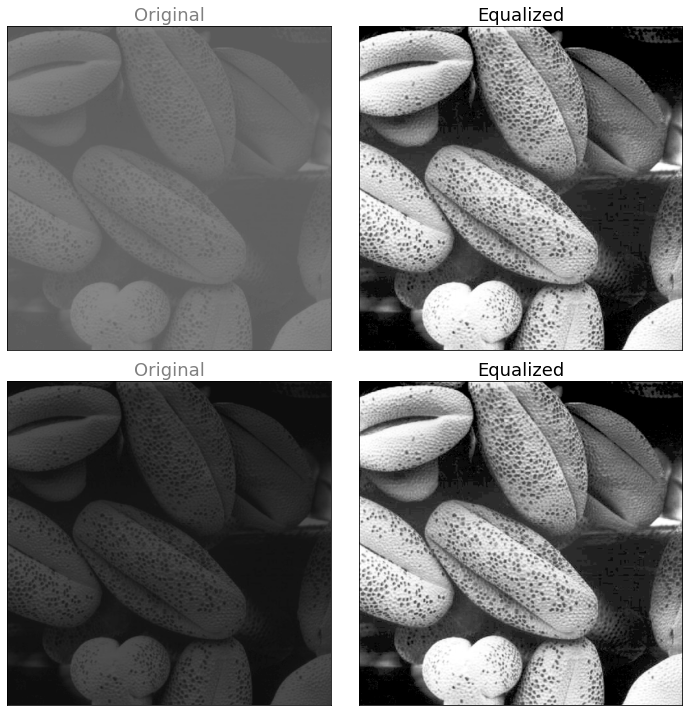

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('Q2_1_1.tiff')
img2 = cv2.imread('Q2_1_2.tiff')

src1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
dst1 = cv2.equalizeHist(src1)

src2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
dst2 = cv2.equalizeHist(src2)

fig, ax = plt.subplots(2,2, figsize=(10,10))


ax[0][0].imshow(img1,'gray')
ax[0][0].set_title('Original', fontsize=18, color='gray')
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][1].imshow(dst1,'gray')
ax[0][1].set_title('Equalized', fontsize=18)
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

ax[1][0].imshow(img2,'gray')
ax[1][0].set_title('Original', fontsize=18, color='gray')
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][1].imshow(dst2,'gray')
ax[1][1].set_title('Equalized', fontsize=18)
ax[1][1].set_xticks([])
ax[1][1].set_yticks([])
plt.tight_layout()
plt.show() 


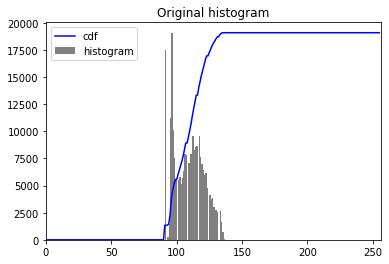

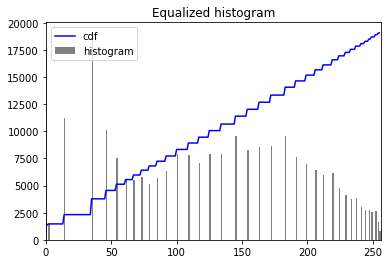

In [ ]:
#Compute and plot histogram of source image
hist,bins = np.histogram(src1.flatten(),256,[0,256])
cdf = hist.cumsum() #cumulative distribution function
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'blue')
plt.title('Original histogram')
plt.hist(src1.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#Compute and plot histogram of improved image
hist,bins = np.histogram(dst1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'blue')
plt.title('Equalized histogram')
plt.hist(dst1.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

91 138
0 255


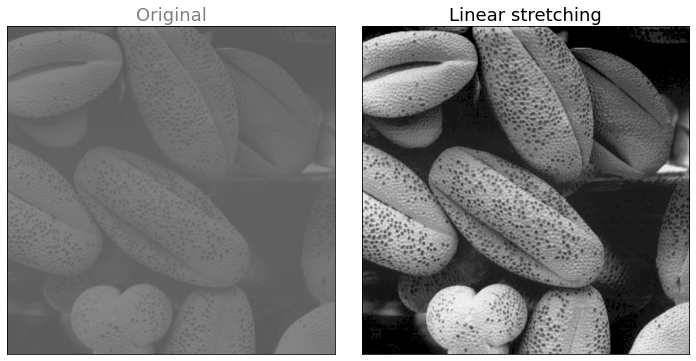

In [ ]:
a=src1.min()
b=src1.max()
print(a,b)
src1.dtype, src1.min(), src1.max(), src1.shape
stretched=255*((src1-a)/(b-a))
print(int(stretched.min()),int(stretched.max()))

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img1,'gray')
ax[0].set_title('Original', fontsize=18, color='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(stretched,'gray')
ax[1].set_title('Linear stretching', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

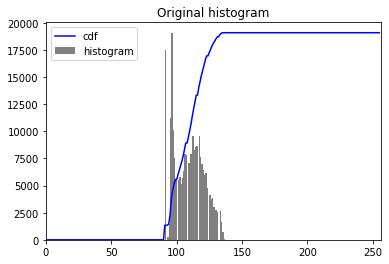

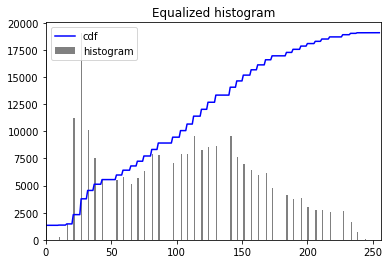

In [ ]:
#Compute and plot histogram of source image
hist,bins = np.histogram(src1.flatten(),256,[0,256])
cdf = hist.cumsum() #cumulative distribution function
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'blue')
plt.title('Original histogram')
plt.hist(src1.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#Compute and plot histogram of original and improved image
hist,bins = np.histogram(stretched.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'blue')
plt.title('Equalized histogram')
plt.hist(stretched.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

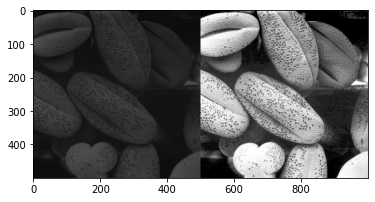

In [ ]:
img2 = cv2.imread('Q2_1_2.tiff')
R, G, B = cv2.split(img2)

output1_R = cv2.equalizeHist(R)
output1_G = cv2.equalizeHist(G)
output1_B = cv2.equalizeHist(B)

equ = cv2.merge((output1_R, output1_G, output1_B))
  
# stacking images side-by-side
res = np.hstack((img2, equ))
plt.imshow(res)

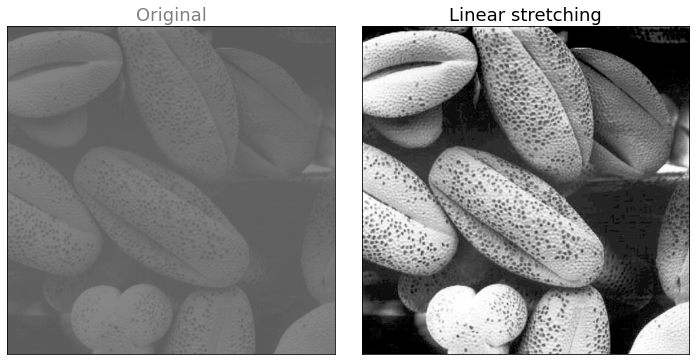

In [ ]:
# Convert from BGR to HSV color space
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

# Stretch the contrast of the V channel
v = hsv_img[:, :, 2]
v_stretched = cv2.equalizeHist(v)
hsv_img[:, :, 2] = v_stretched

# Convert back to BGR color space
new_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

# Display the original and improved images

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img1)
ax[0].set_title('Original', fontsize=18, color='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(new_img)
ax[1].set_title('Improved Image', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()
